*Group Members*: 

- Nabil Arrouss (qup85ses) 
- Ahmad Pamir Sahak (las06weq) 
- Kohei Fujimura (koj66veq) 
- Heydar Bagloo ( yeq42hip) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd

from tqdm import tqdm #optional, if you do not want to import remove tqdm() from loops!

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#
# Read the data
#
data=np.array(pd.read_csv("Data.csv"))
Y=data[:,0].reshape((-1,1))
X=data[:,1:]

#
# Apply some scaling because the value ranges are too big
#
for i in range(X.shape[1]):
    X[:,i]=(X[:,i]-np.amin(X[:,i]))/(np.amax(X[:,i])-np.amin(X[:,i]))
Y=(Y-np.amin(Y))/(np.amax(Y)-np.amin(Y))


#
# Optional: Maybe you find a better scaling alternative, try different approaches if you want
#

# a) Calculating the Pseudo-Inverse directly
Use numpy to calculate the Moore-Penrose pseudo-inverse and solve 

$min||XW-Y||_2$

In [3]:
# TODO: Solve the problem by calculating the pseudo inverse using numpy.linalg.pinv()
X_pinv = np.linalg.pinv(X)
W = X_pinv @ Y


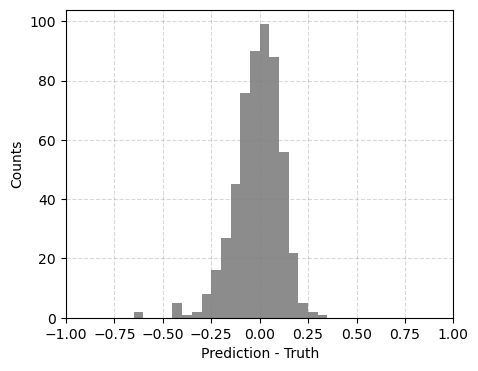

In [4]:
# TODO: Enter your prediction variables
E=np.power(X@W-Y,1)


fig, ax = plt.subplots(figsize=(5, 4))

ax.hist(E, bins=40, alpha=0.9, histtype='bar', ec='black', 
        range=[-1,1], color="grey")
ax.set_xlabel("Prediction - Truth")
ax.set_ylabel("Counts")
ax.set_xlim([-1, 1])
ax.grid(color='gray', linestyle='dashed', alpha=0.3)
plt.show()

# b) Calculating the Pseudo-Inverse by deriving the SVD

In [5]:
# TODO: Solve the problem by calculating the pseudo inverse using the SVD. Use numpy.linalg.svd() to get the SVD components.
#       Use the SVD components to derive the pseudo inverse.
# SVD of X
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Build Sigma 
S_inv = np.diag(1.0 / S)

# Pseudo-inverse from SVD
X_pinv_svd = Vt.T @ S_inv @ U.T

# Solve for W using SVD pseudo-inverse
W = X_pinv_svd @ Y

# TODO: compare the results, e.g. np.max(A_1 - A_2)
X_pinv = np.linalg.pinv(X)
diff = np.max(np.abs(X_pinv - X_pinv_svd))
print("Max difference between pseudo-inverses:", diff)

Max difference between pseudo-inverses: 2.220446049250313e-16


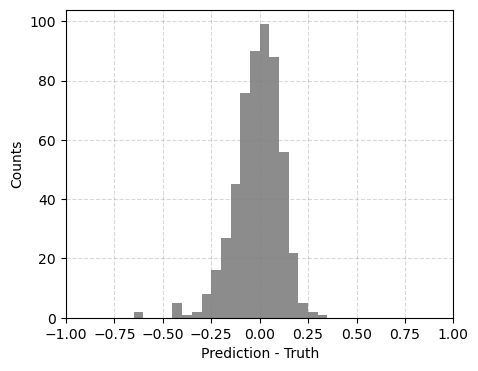

In [6]:
# TODO: Enter your prediction variables
E=np.power(X@W-Y,1)


fig, ax = plt.subplots(figsize=(5, 4))

ax.hist(E, bins=40, alpha=0.9, histtype='bar', ec='black', 
        range=[-1,1], color="grey")
ax.set_xlabel("Prediction - Truth")
ax.set_ylabel("Counts")
ax.set_xlim([-1, 1])
ax.grid(color='gray', linestyle='dashed', alpha=0.3)
plt.show()